In [ ]:
'''
Topic: K-means clustering
Dataset: Shopping-data dataset
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster.
In K-Means, each cluster is associated with a centroid.

METHODOLOGY
Part 1: 
Read and parse the initial dataset
Load it into our pandas dataframe
Display the dataset with feature information
Part 2: 
Choose the number of clusters k
Select k random points from the data as centroids
Part 3:
Assign all the points to the closest cluster centroid
Recompute the centroids of newly formed clusters
Part 4:
Using the elbow method to determine the optimal number of clusters for k-means clustering
Visualising the clusters
Plotting the centroids of the clusters
'''

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

df= pd.read_csv("shopping-data.csv")
df.info()
x = df.iloc[:, [2, 3, 4]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


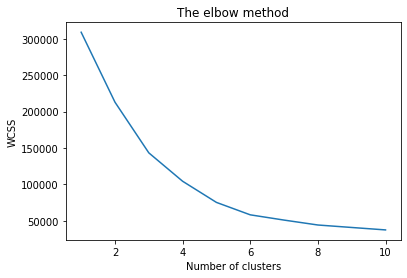

In [2]:
#Finding the optimum number of clusters for k-means classification, the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that if K increases, average distortion will decrease. 
Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. 
However, the improvements in average distortion will decline as K increases. 
The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

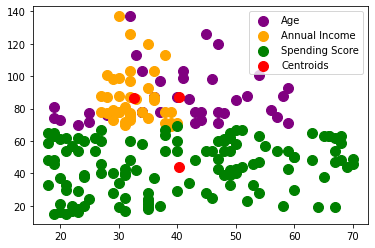

In [3]:
#Visualising the clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Age')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Annual Income')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Spending Score')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

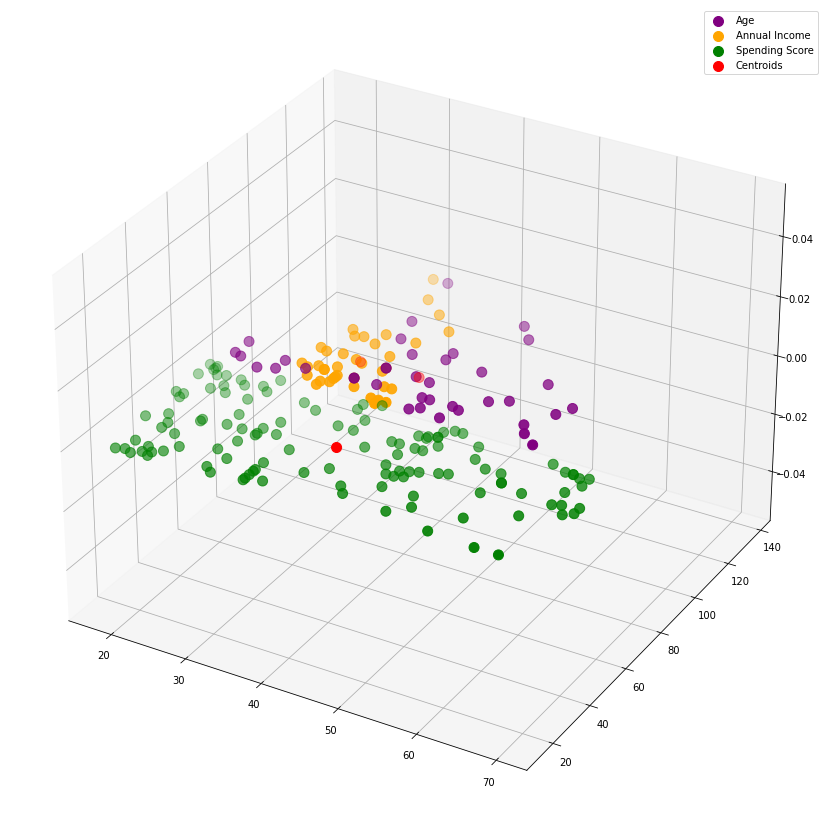

In [4]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Age')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Annual Income')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Spending Score')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

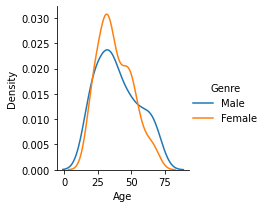

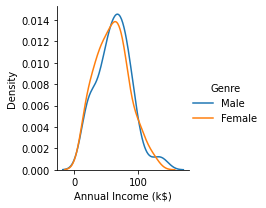

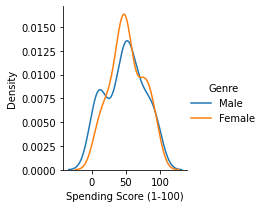

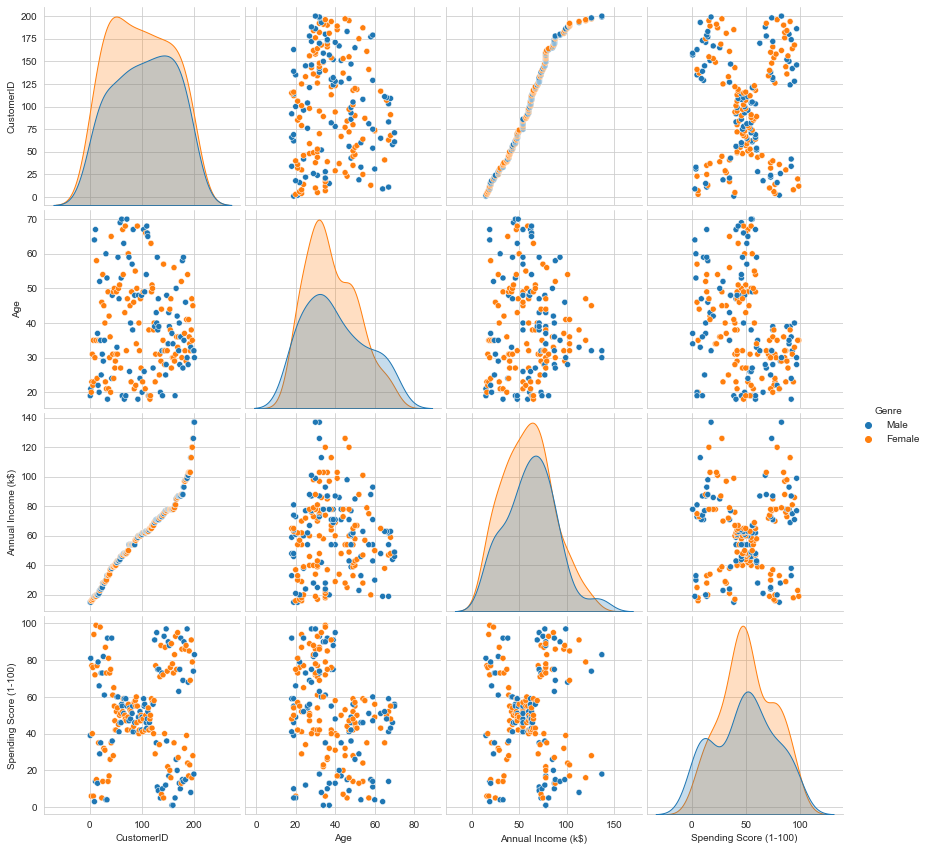

In [5]:
sns.FacetGrid(df,hue="Genre",height=3).map(sns.kdeplot,"Age").add_legend()
sns.FacetGrid(df,hue="Genre",height=3).map(sns.kdeplot,"Annual Income (k$)").add_legend()
sns.FacetGrid(df,hue="Genre",height=3).map(sns.kdeplot,"Spending Score (1-100)").add_legend()
plt.show()

sns.set_style("whitegrid")
sns.pairplot(df,hue="Genre",height=3);
plt.show()